# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    make_scorer,
    confusion_matrix
)

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# loading the dataset
#  from google.colab import drive
#  drive.mount("/gdrive")#
#  %cd /gdrive/My Drive/Personal Loan Campaign - Project 2

## Loading the dataset

In [3]:
url = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/Loan_Modelling.csv'
loanData = pd.read_csv(url)

## Data Overview

In [4]:
loanData.shape

(5000, 14)

**Observation:**
There are 5000 Rows and 14 columns(features) in this data set

In [ ]:
#Display First 10 records from the dataset
loanData.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


**Observation**

The DataFrame has 14 columns as mentioned in the Data Dictionary. Data in each row corresponds to the loan applicant.

In [ ]:
# Display last 10 data of the dataset
loanData.tail(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4990,4991,55,25,58,95023,4,2.00,3,219,0,0,0,0,1
4991,4992,51,25,92,91330,1,1.90,2,100,0,0,0,0,1
4992,4993,30,5,13,90037,4,0.50,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.00,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.50,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.80,1,0,0,0,0,1,1


**Observation:**
Viewing the last 10 data in the loan dataset.

In [ ]:
#Show the datatype of each feature in this dataset.
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation**
All features in this data set have numerical value. Zipcode is a categorical value however the data type for zipcode is int64 in this dataset.

In [ ]:
#Converting Zipcode to a categorical value
loanData['ZIPCode'] = loanData['ZIPCode'].astype(str)

In [ ]:
# Find missing values in this loanData Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = loanData.isnull().sum()
print(missing)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


**Observation:**
There are no missing values in any of the columns in the dataset.


# ****Dropping the Duplicate Values****

In [ ]:
# checking for duplicate values
loanData.duplicated().sum()

0

**Observation:**
There are no duplicate values in the dataset.

# Dropping Columns with all Unique Values

In [ ]:
# Unique Values
loanData.ID.nunique()

5000

**Observation:**
ID Column has only unique values, so this column can be dropped.

In [ ]:
# Dropping the column ID
df = loanData.drop(["ID"], axis=1)

# Statistical Summary of the dataset

In [ ]:
# Checking the statistical summary of the data.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


**Observations**
*   The age ranges from 23 to 67
*   Mortgage ranges from 101k to 635k
*   Age 55 at the 75th percentile. Some of the population are more than 55      
    or older.
*   Average Income of the population is 73.7K
*   Average Experience for the population is 11.46 years
*   50% of population make less than 65K per annual salary.



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

The below functions need to be defined to carry out the EDA.

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="lightgreen"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow",hue=target)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",hue=None
    )

    plt.tight_layout()
    plt.show()

# Univariate Analysis


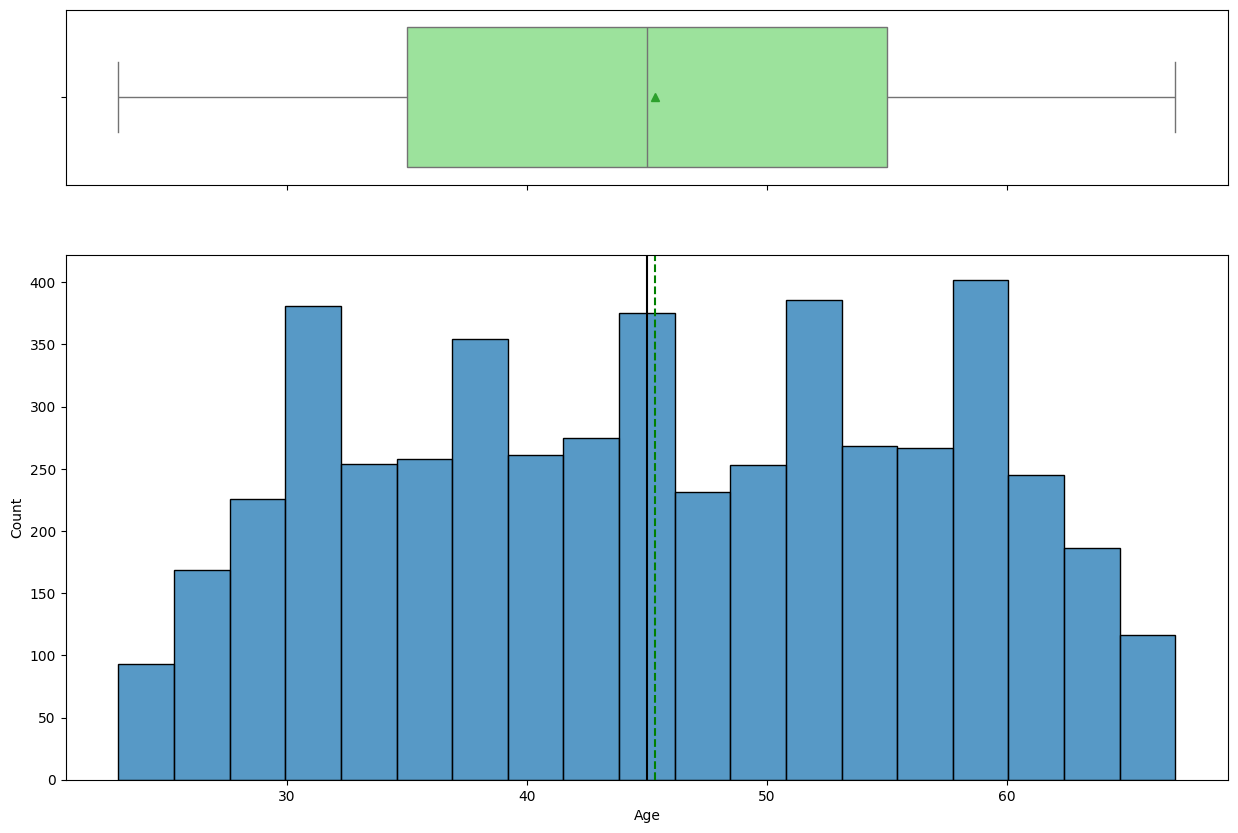

In [ ]:
histogram_boxplot(df, "Age")

**Observation**

* The age distribution looks slightly right skewed with the average age which is 45.
* There are no outliers present.

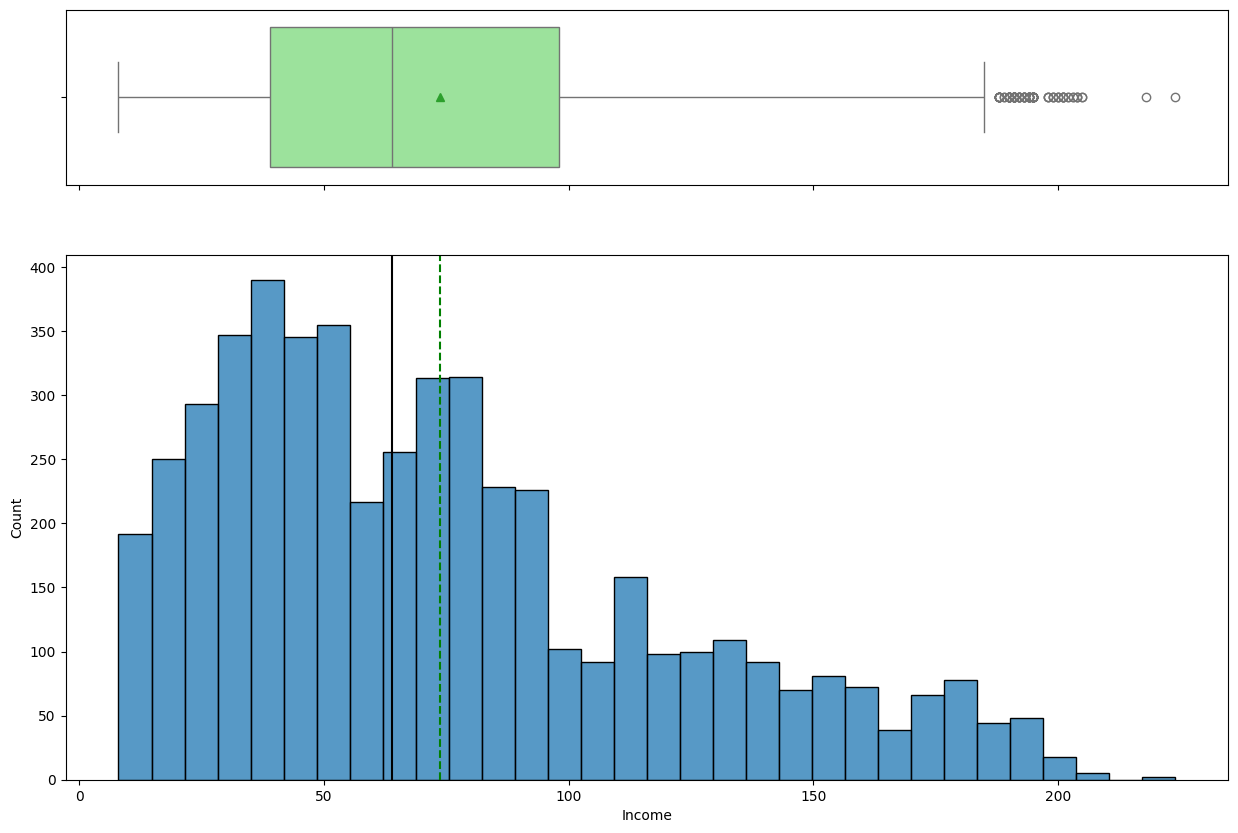

In [ ]:
histogram_boxplot(df, "Income")

Observation:
* The income distribution is skewed to the right with many outliers on the upper quartile.
* Majority of the poulation income is between 15K - 95 K


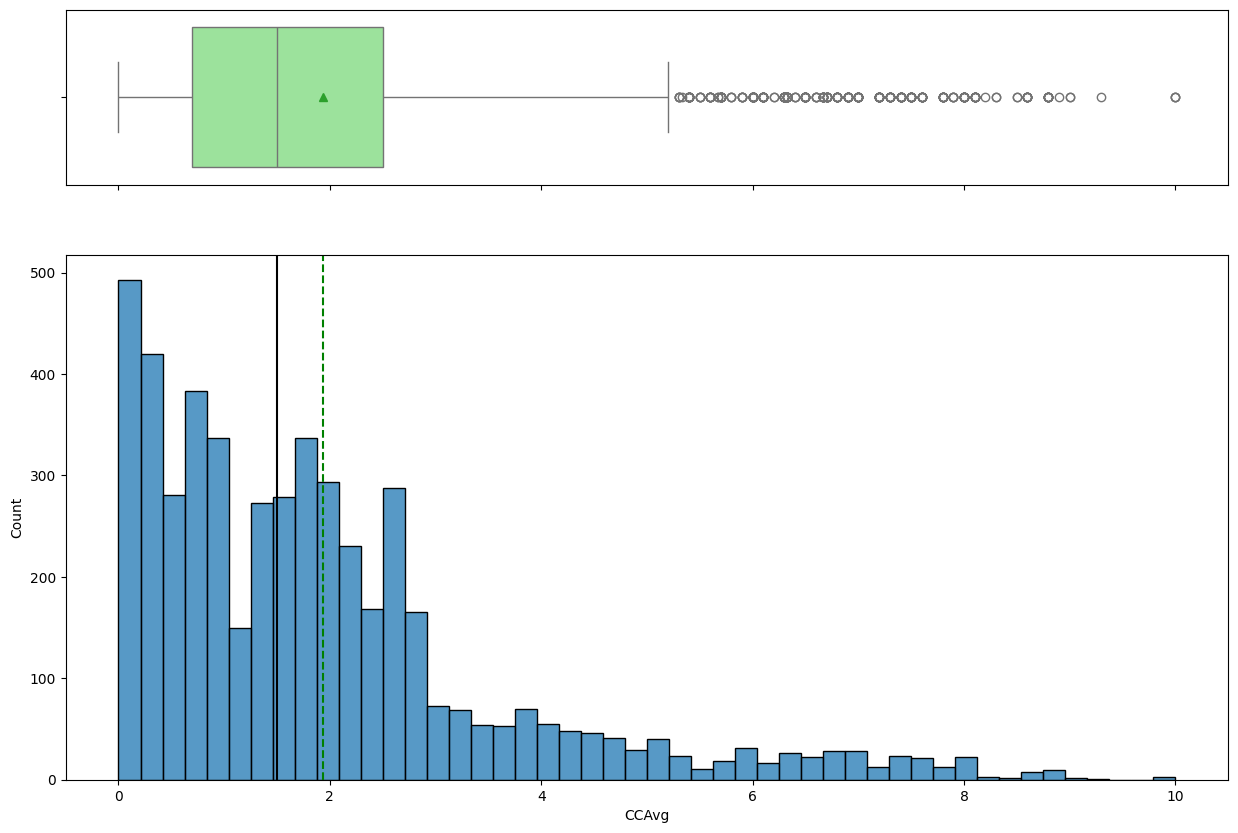

In [ ]:
histogram_boxplot(df, "CCAvg")

**Observation:**
* The Credit Card balance is right skewed with many outliers on the upper quartile.
* Majority of the population have less than 4K Credit Card Debt.

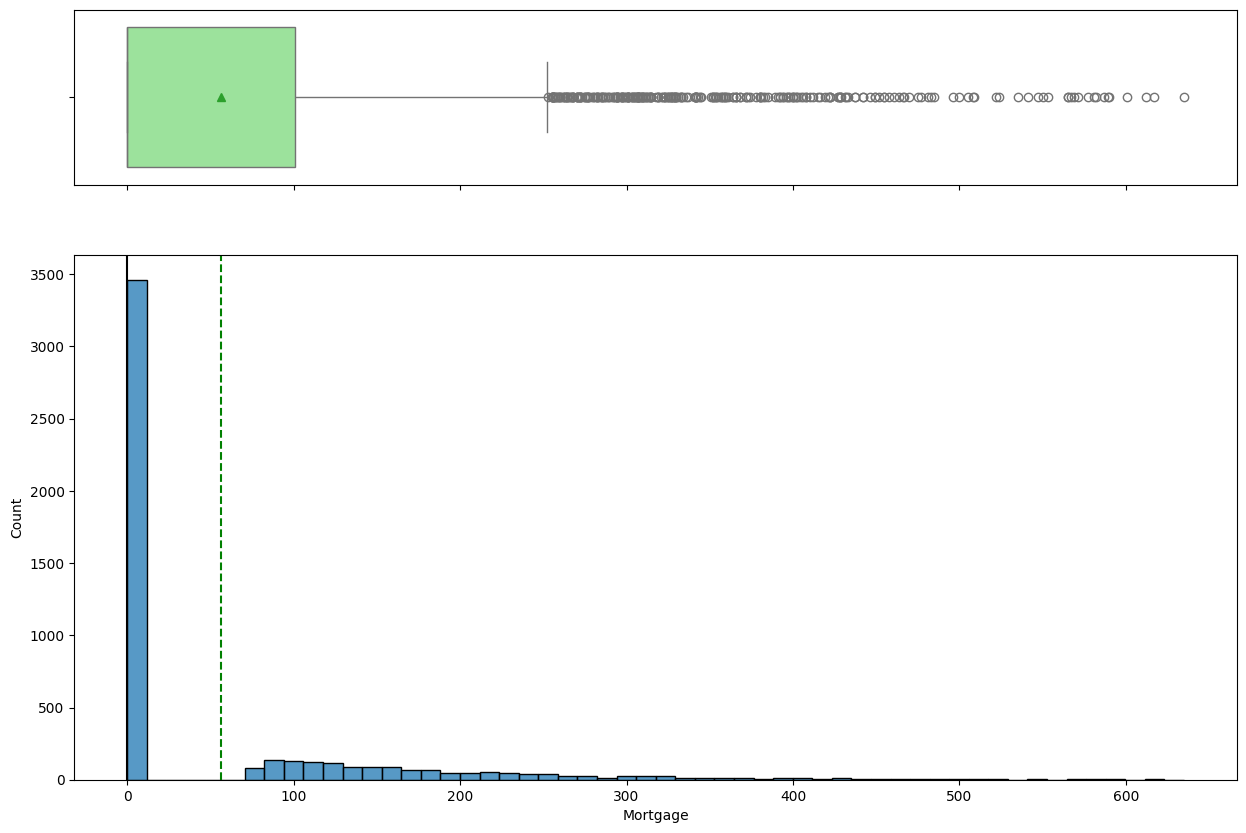

In [ ]:
histogram_boxplot(df, "Mortgage")

**Observation**

* Most of the population has no Mortgage. Either they have paid off the mortgage or renting a property to live. This information is unavailable in this dataset.
* So the distribution of the Mortgage is heavily right skewed with several outliers in the upper quartlie.


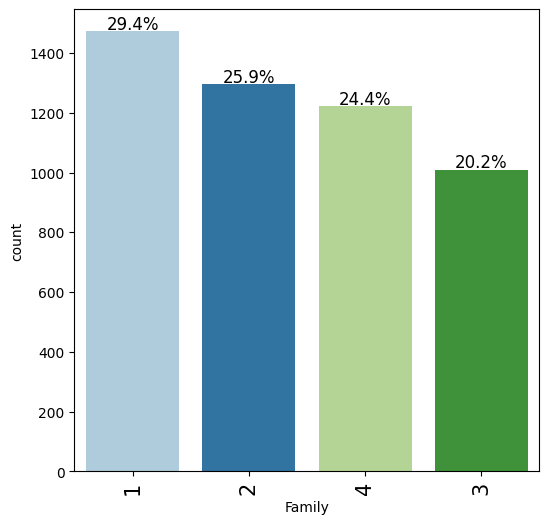

In [ ]:
labeled_barplot(df, "Family", perc=True)

**Observation**
*   29% of the family size is 1, also they are largest portion of this data set.
*   Family Size with individuals 3 has the lowest among the population at 20%



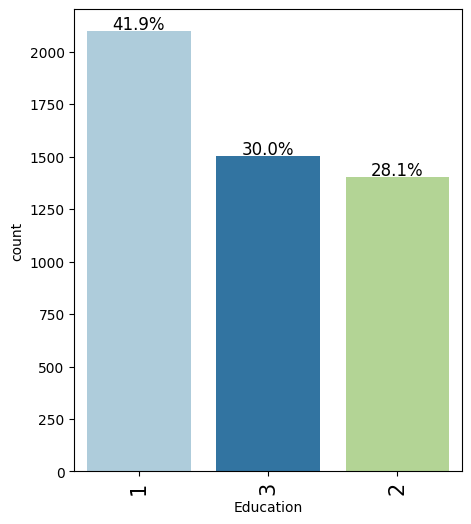

In [ ]:
labeled_barplot(df, "Education", perc=True)

**Observation**
* most of the popluation in this data set are under graduate.
* 30% of the population has an advanced degree and 28% are Graduates.

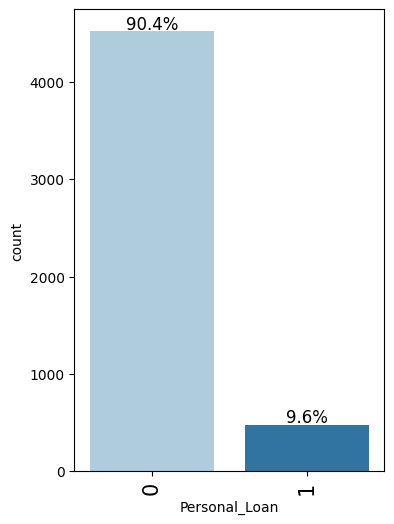

In [ ]:
labeled_barplot(df, "Personal_Loan", perc=True)

**Observation**
* Most of the population does not have a personal loan.


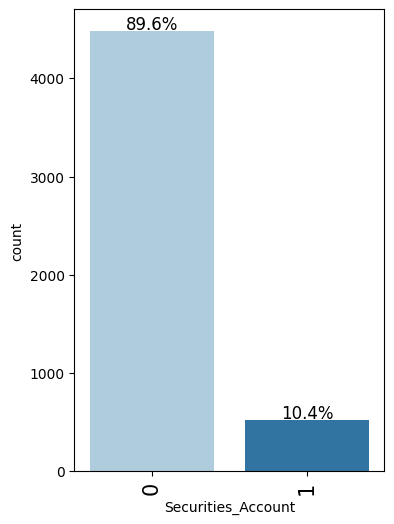

In [ ]:
labeled_barplot(df, "Securities_Account", perc=True)

**Observation**
*   Only 10% of the population have Securities Account

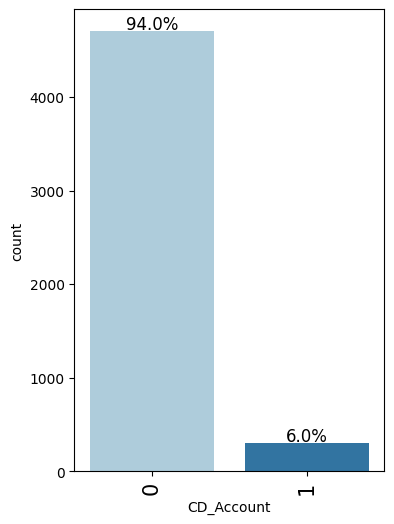

In [ ]:
labeled_barplot(df, "CD_Account", perc=True)

**Observation**
* Only 6% of the population have a CD Account.

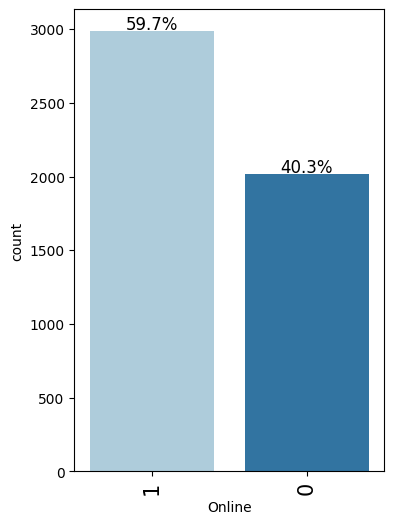

In [ ]:
labeled_barplot(df, "Online", perc=True)

**Observation**
* 60% of the population have an Online Bank Account.

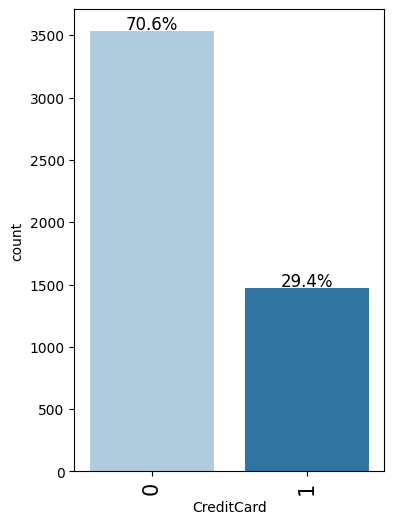

In [ ]:
labeled_barplot(df, "CreditCard", perc=True)

**Observation**
* 70% of the population does not have a Credit Card from another bank, only 39 percent have a Credit Card issued by another bank.

**How Many customers have Credit Cards?**

In [ ]:
# Write the code here
CustomerwithCreditCards=df['CreditCard'].value_counts()
CustomerwithCreditCards.head(5)

CreditCard
0    3530
1    1470
Name: count, dtype: int64

**Observation**

* There are 3530 people with Credit Cards.

**Correlation**

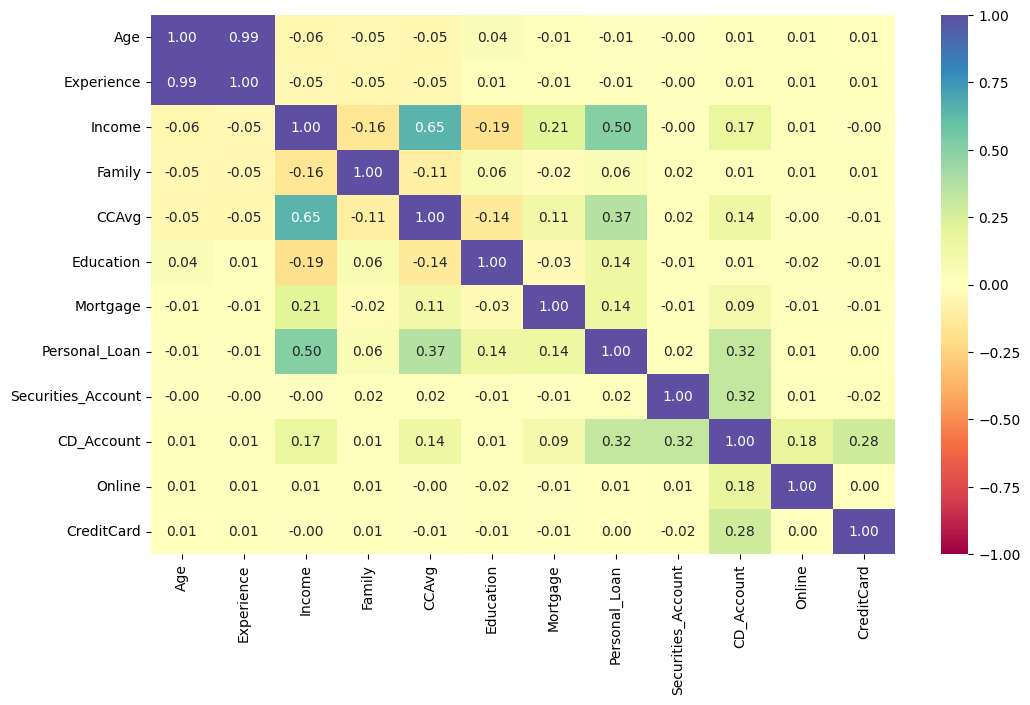

In [ ]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()


**Observation**
* Experience and Age has a strong positive correlation.
* Income and Credit Card Average Balance has a positive correlation.
* What are the attributes that have a strong correlation with the target attribute (personal loan)?
  * Income, Credit Card Average Balance and CD Account has strong coorelation with the target attribute (personal loan).

# BiVariant Analysis

**Let's see how the target variable varies across the type of the product**

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


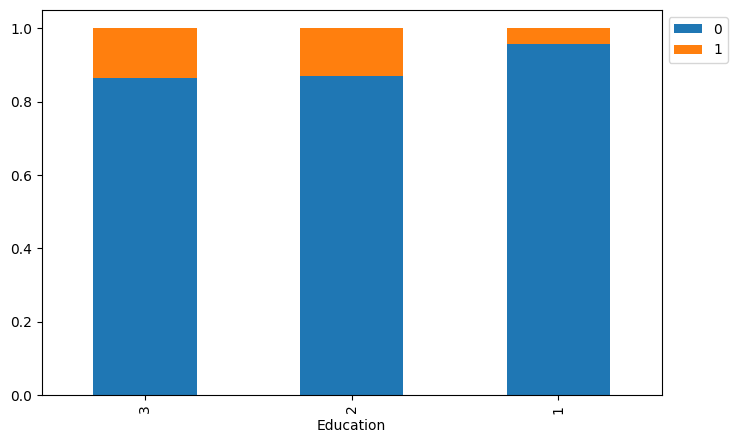

In [ ]:
stacked_barplot(df, "Education", "Personal_Loan")

**Observation**
* Less than 20% of the population have personal loan when the have an advanced degree.
* Less than 20% of the population have personal loan when the have an graduate degree.
* Less than 10% of the population have personal loan when they have a Under Graduate degree.

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


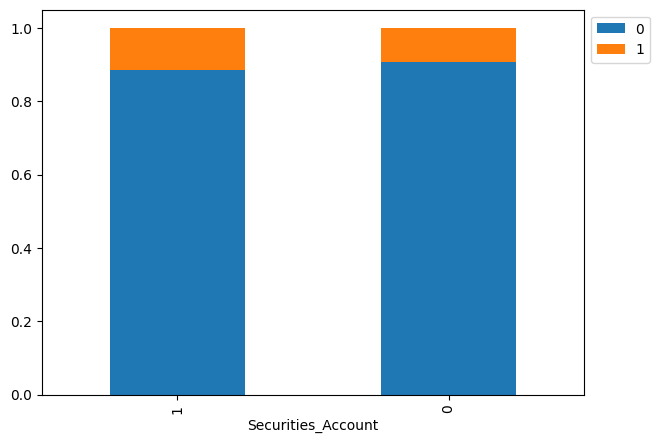

In [ ]:
stacked_barplot(df, "Securities_Account", "Personal_Loan")

**Observation**
* Most of population does have a personal loan whether they have a securities account or not.

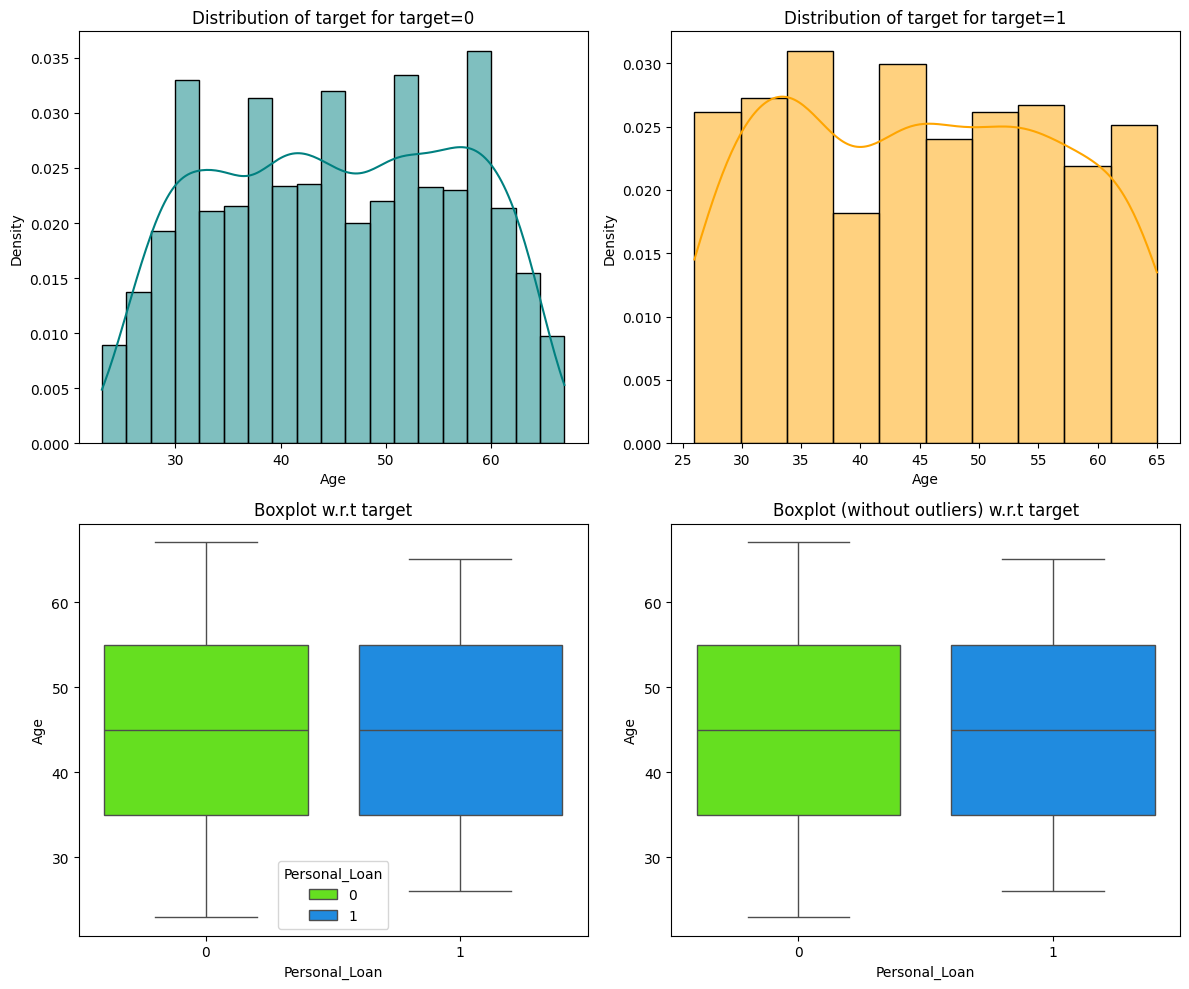

In [ ]:
distribution_plot_wrt_target(df, "Age", "Personal_Loan")

**Observation**
*   The dataset does not contain any outliers, regardless of whether the population has a personal loan or not.
*   The population who have personal loans are predominantly over 25 years old and less than 65 years old.
*   There is a sizable population between the ages of 25 and 65 who do not have personal loans.
* Individuals around 35 years old have the highest number of personal loans.
* Individuals in their late 30s to early 40s possess fewer personal loans compared to other demographics.


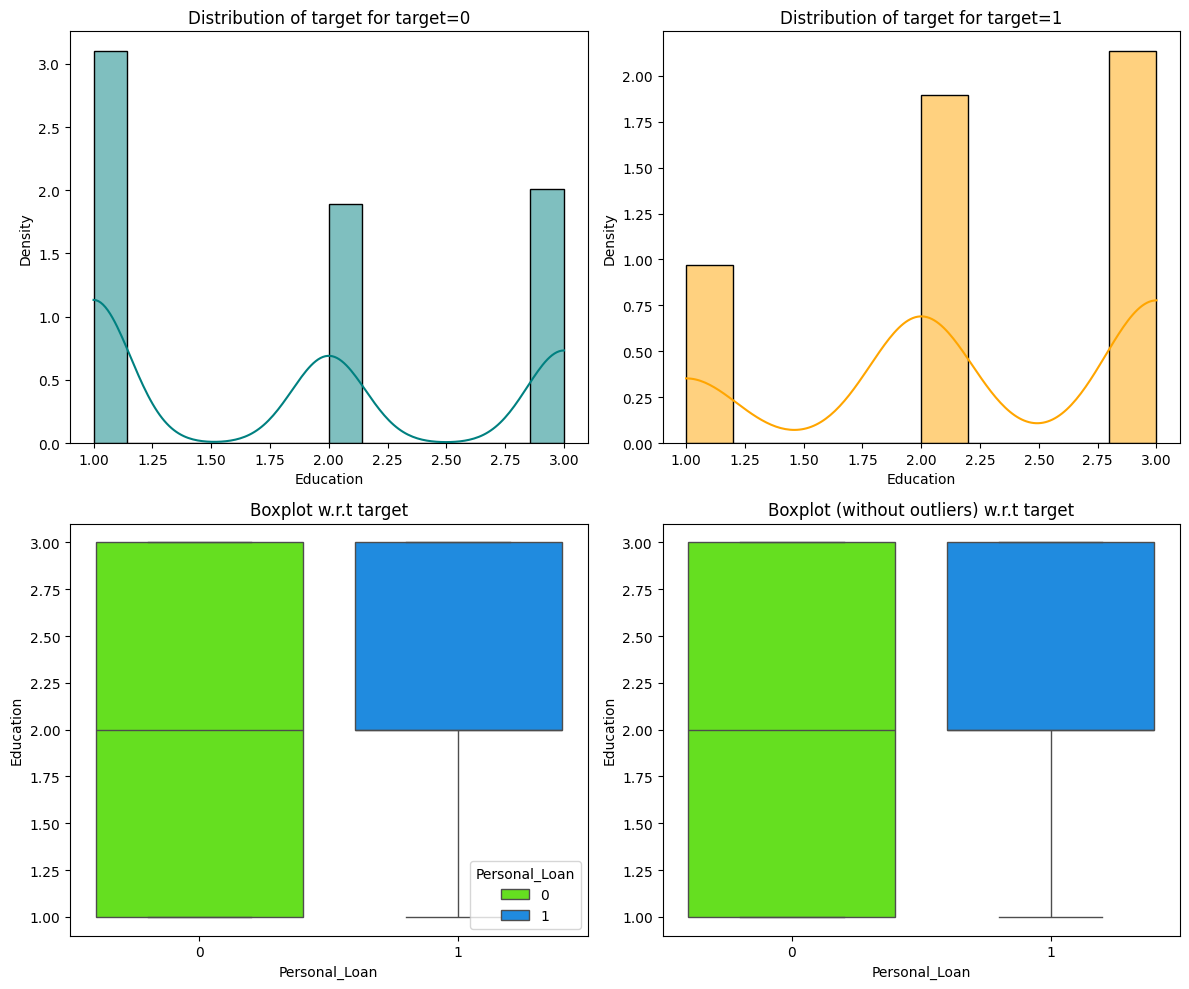

In [ ]:
distribution_plot_wrt_target(df, "Education", "Personal_Loan")

**Observation:**
* Among the population without personal loans, the highest numbers are attributed to undergraduates, followed by holders of advanced degrees and graduates.
* Among the population with personal loans, the highest numbers are found among advanced degree holders, followed by graduates and undergraduates.
* Advanced degree holders appear to have a higher number of personal loans compared to the other two categories.
* Undergraduates appear to exhibit the lowest level of interest in personal loans. Not only do they possess fewer personal loans overall, but they also represent the demographic with the highest proportion of individuals who do not have a personal loan.


In [ ]:
df.tail(5)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

All these questions are answered in the Univariant and BiVariant Analysis.

# Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

**MISSING Value Treatment**

In [ ]:
# Find missing values in this loanData Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = df.isnull().sum()
print(missing)

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64


**Observation**
There are no missing values to treat.

**Feature Engineering**

In [ ]:
df['City'] = ''
df['County'] = ''
df['State'] = ''


In [ ]:
# Install PGEOCODE libraries
!pip install pgeocode

In [ ]:
# Load the ZIP code to county mapping dataset
# Replace 'zip_code_database.csv' with the actual path to your CSV file
url = 'https://raw.githubusercontent.com/vijay-aacintya/dsp_data/refs/heads/main/zip_code_database.csv'
zip_county_df = pd.read_csv(".csv")
#loanData = pd.read_csv("Loan_Modelling.csv")

In [ ]:
zip_county_df.head(10)

,zipcode,city,state,county,country
0,90001,Los Angeles,CA,Los Angeles County,US
1,90002,Los Angeles,CA,Los Angeles County,US
2,90003,Los Angeles,CA,Los Angeles County,US
3,90004,Los Angeles,CA,Los Angeles County,US
4,90005,Los Angeles,CA,Los Angeles County,US
5,90006,Los Angeles,CA,Los Angeles County,US
6,90007,Los Angeles,CA,Los Angeles County,US
7,90008,Los Angeles,CA,Los Angeles County,US
8,90009,Los Angeles,CA,Los Angeles County,US
9,90010,Los Angeles,CA,Los Angeles County,US


In [ ]:
import pgeocode

In [ ]:
# Initialize the Nominatim geocoder for the US
nomi = pgeocode.Nominatim('us')

zip_county_df['zipcode'] = zip_county_df['zipcode'].astype(str)

# Function to get city and state from a zip code
def get_city_state(zipcode):
    location = nomi.query_postal_code(zipcode)
    if pd.isnull(location.place_name) or pd.isnull(location.state_name):
        return pd.Series([None, None])
    return pd.Series([location.place_name, location.state_name])

# Function to get county from a zip code
def get_county_from_zip(zipcode):
    # Ensure the provided zipcode is a string
    zipcode = str(zipcode)

    # Lookup the county in the dataframe
    result = zip_county_df.loc[zip_county_df['zipcode'] == zipcode]

    if result.empty:
        return None
    else:
        return result['county'].values[0]

# Apply the functions to each row in the ZipCode column
df[['City', 'State']] = df['ZIPCode'].apply(get_city_state)
df['County'] = df['ZIPCode'].apply(get_county_from_zip)


Added two more attributes to the dataset base on the zip code. This provides more details regarding of the dataset.

In [ ]:
# Dropping the column ZipCode
df = df.drop(["ZIPCode"], axis=1)
# Dropping the column State
df = df.drop(["State"], axis=1)

**Observation**
On ZIPCode, we are dropping the column because we have feature engineered the column to get City and County. We did that because there was very little observations from each zipcode.

On State, there is only one value in the dataset. So we can drop this column as this would not impact our analysis.

In [ ]:
# Now checking whether we have any missing values in our dataset after our feature engineering step.
# Find missing values in this loanData Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = df.isnull().sum()
print(missing)

Age                    0
Experience             0
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
City                  41
County                34
dtype: int64


In [ ]:
# Drop rows where the County column is NaN
df_cleaned = df.dropna(subset=['County'])

In [ ]:
# Now checking whether we have any missing values in our dataset after our feature engineering step.
# Find missing values in this loanData Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = df_cleaned.isnull().sum()
print(missing)

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  7
County                0
dtype: int64


In [ ]:
# Drop rows where the County column is NaN
df_cleaned = df.dropna(subset=['City'])
# Now checking whether we have any missing values in our dataset after our feature engineering step.
# Find missing values in this loanData Set
#Find whether any data is missing using .isnull function
#Sum for each columns using .sum()
missing = df_cleaned.isnull().sum()
print(missing)

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
City                  0
County                0
dtype: int64


In [ ]:
# display 5 records of the dataset
df_cleaned.head(10)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,City,County
0,25,1,49,4,1.6,1,0,0,1,0,0,0,Pasadena,Los Angeles County
1,45,19,34,3,1.5,1,0,0,1,0,0,0,Los Angeles,Los Angeles County
2,39,15,11,1,1.0,1,0,0,0,0,0,0,Berkeley,Alameda County
3,35,9,100,1,2.7,2,0,0,0,0,0,0,San Francisco,San Francisco County
4,35,8,45,4,1.0,2,0,0,0,0,0,1,Northridge,Los Angeles County
5,37,13,29,4,0.4,2,155,0,0,0,1,0,San Diego,San Diego County
6,53,27,72,2,1.5,2,0,0,0,0,1,0,Claremont,Los Angeles County
7,50,24,22,1,0.3,3,0,0,0,0,0,1,Monterey,Monterey County
8,35,10,81,3,0.6,2,104,0,0,0,1,0,Los Angeles,Los Angeles County
9,34,9,180,1,8.9,3,0,1,0,0,0,0,Ojai,Ventura County


**Observation:**

We dropped 41 records due to NULL values. We did not treat those records because there were only few records compared to actual number of records in the dataset.

**Outlier Detection**

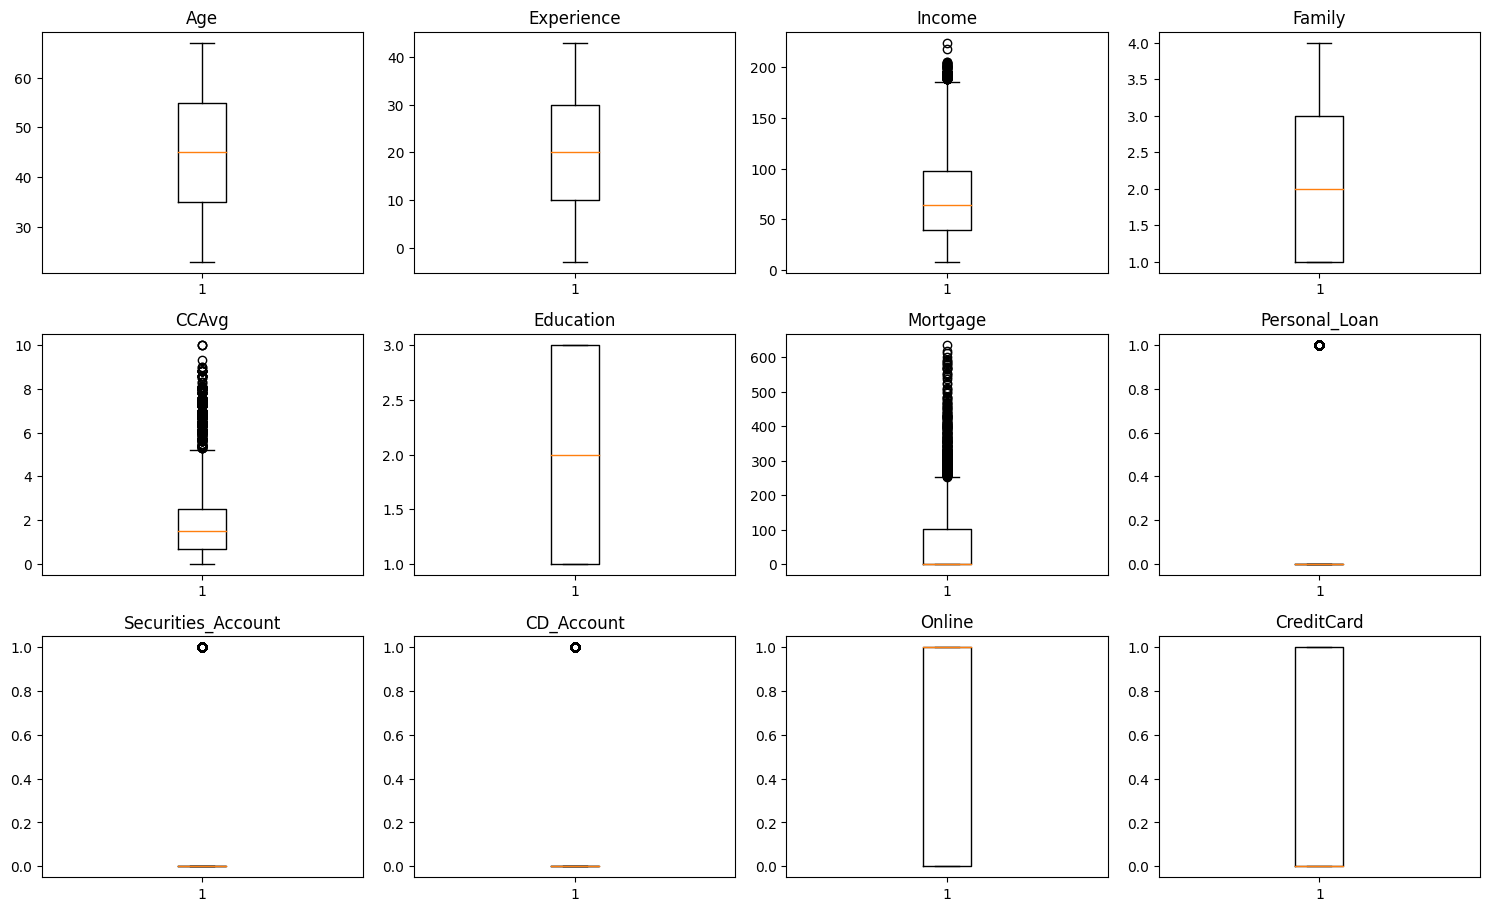

In [ ]:
# Selecting Numeric Columns
numeric_columns = df_cleaned.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))
# Plotting the outlier box plot
for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values

# Data Preparation for Model Building

In [ ]:
#Preparing for data for Modeling
X = df_cleaned.drop(["Personal_Loan"], axis=1)
Y = df_cleaned["Personal_Loan"]
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3471, 291)
Shape of test set :  (1488, 291)
Percentage of classes in training set:
Personal_Loan
0    0.905791
1    0.094209
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.899866
1    0.100134
Name: proportion, dtype: float64


**Observation**

We had seen that around 90.5% of observations belongs to class 0 (Not Failed) and 9.4% observations belongs to class 1 (Failed), and this is preserved in the train and test sets

# Model Building

**Model Evaluation**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

**Decision Tree (Default)**

In [ ]:
model0 = DecisionTreeClassifier(random_state=1)
model0.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

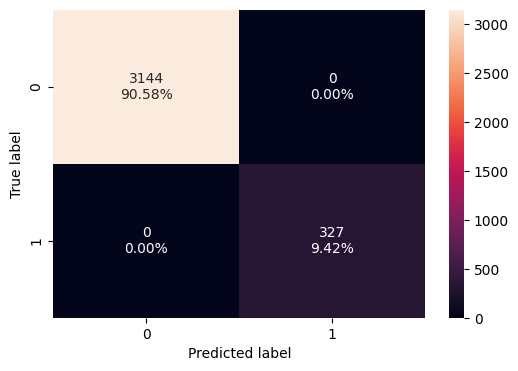

In [ ]:
confusion_matrix_sklearn(model0, X_train, y_train)

In [ ]:
decision_tree_perf_train_without = model_performance_classification_sklearn(
    model0, X_train, y_train
)
decision_tree_perf_train_without

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


**Observation**
* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

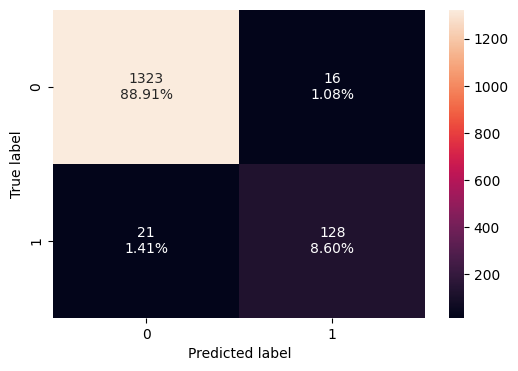

In [ ]:
confusion_matrix_sklearn(model0, X_test, y_test)

In [ ]:
decision_tree_perf_test_without = model_performance_classification_sklearn(model0, X_test, y_test)
decision_tree_perf_test_without

,Accuracy,Recall,Precision,F1
0,0.975134,0.85906,0.888889,0.87372


**Observation**
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes

* In this case, we will set class_weight = "balanced", which will automatically adjust the weights to be inversely proportional to the class frequencies in the input data

* class_weight is a hyperparameter for the decision tree classifier

# Model Performance Improvement

## Decision Tree - Balanced

In [ ]:
model = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

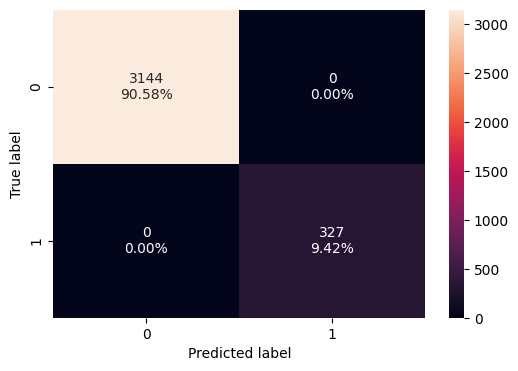

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

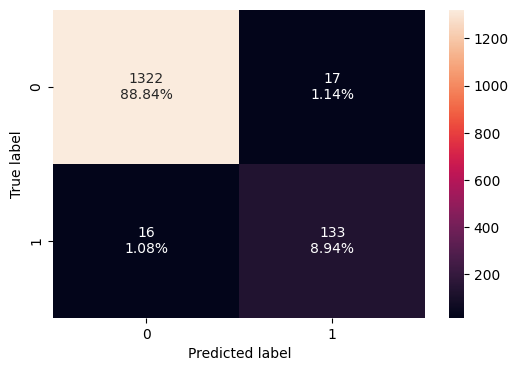

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.977823,0.892617,0.886667,0.889632


**Observation**
* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.
* Also there is not much difference between the two models both have similar recall outcomes(values)

**Let's use pruning techniques to try and reduce overfitting.**

## Decision Tree(Pre-Pruning)

**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.


In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(3, 12, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=50,
                       min_samples_split=10, random_state=1)

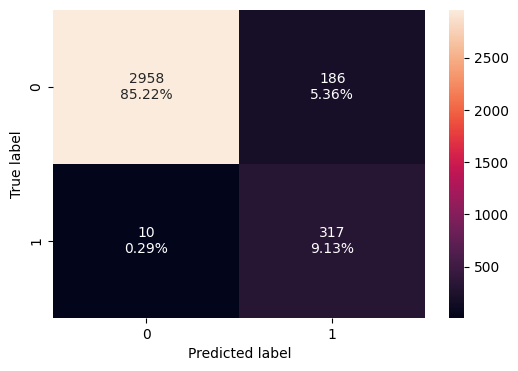

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.943532,0.969419,0.630219,0.763855


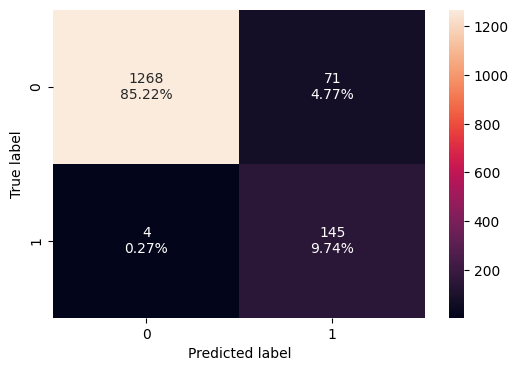

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.949597,0.973154,0.671296,0.794521


**Observation**
* The model is giving a generalized result now since the recall scores on both the train and test data are coming to be around 0.97 which shows that the model is able to generalize well on unseen data.
* When i tried to go deeper in to the tree, the model was overfitting.

In [ ]:
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

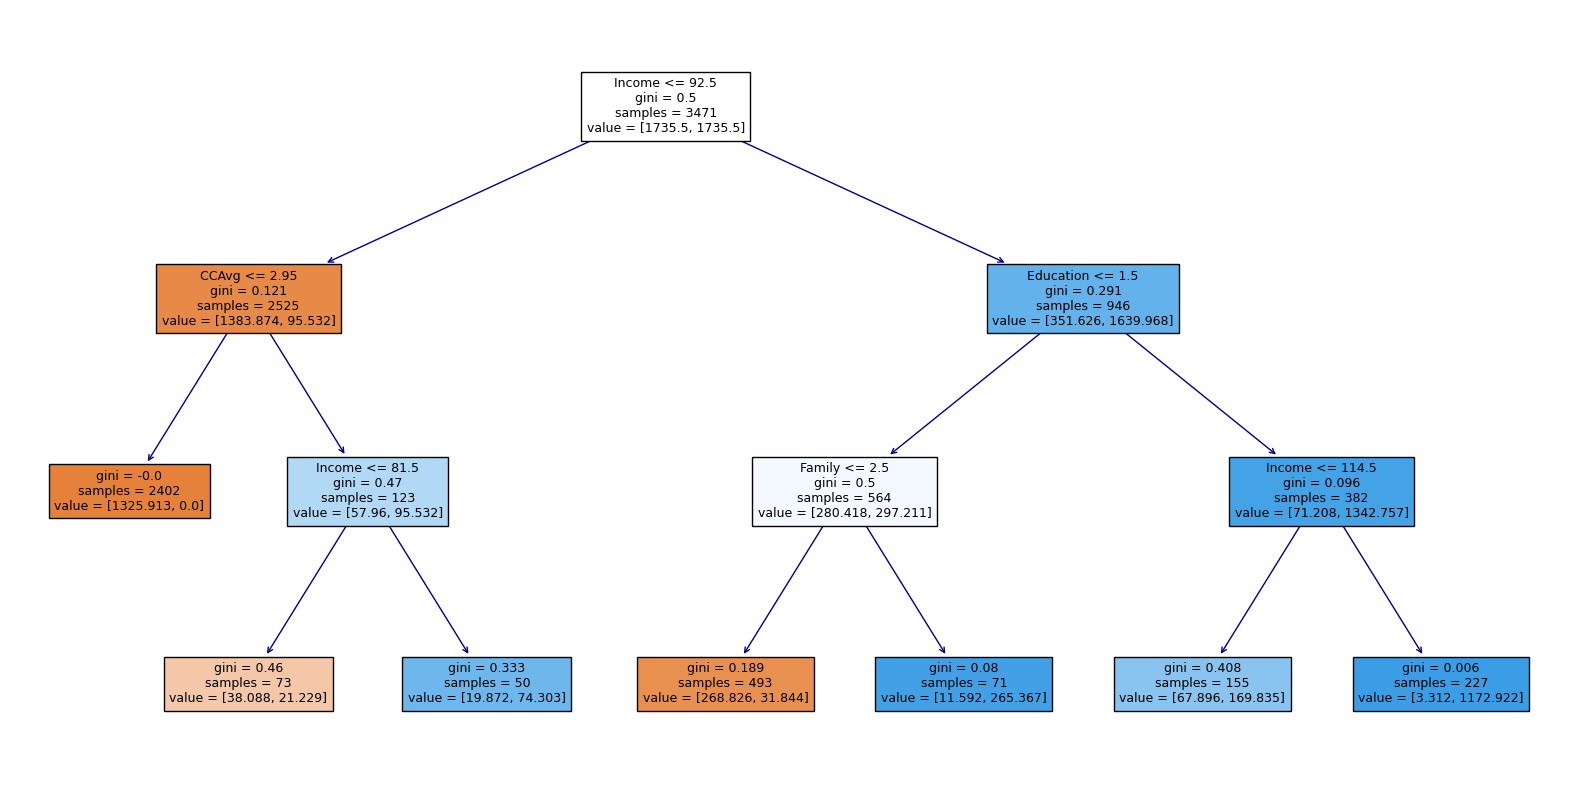

In [ ]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("darkblue")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1325.91, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 81.50
|   |   |   |--- weights: [38.09, 21.23] class: 0
|   |   |--- Income >  81.50
|   |   |   |--- weights: [19.87, 74.30] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [268.83, 31.84] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [11.59, 265.37] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- weights: [67.90, 169.83] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [3.31, 1172.92] class: 1



**Observations from the pre-pruned tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

If the Income is less than 92.5k and Credit Card Avg greater than 2.95k and income is again greater than 81k, the model is predicting that the person has a loan.

In [ ]:
importances = estimator.feature_importances_
importances

array([0.        , 0.        , 0.68458287, 0.14015979, 0.07133253,
       0.1039248 , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
# importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(126, 126))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:
* In the pre tuned decision tree, Income, Family, Education and CCAvg are the most important features.

##Decision Tree (Post pruning)

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the "weakest link". The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [ ]:
# Splitting data in train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, Y, test_size=0.25, random_state=1
)

In [ ]:
print("Shape of Training set : ", X1_train.shape)
print("Shape of test set : ", X1_test.shape)
print("Percentage of classes in training set:")
print(y1_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y1_test.value_counts(normalize=True))

Shape of Training set :  (3719, 291)
Shape of test set :  (1240, 291)
Percentage of classes in training set:
Personal_Loan
0    0.906695
1    0.093305
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.895968
1    0.104032
Name: proportion, dtype: float64


In [ ]:
clf = DecisionTreeClassifier(random_state=1,class_weight="balanced") # {0: 0.15, 1: 0.85}
path = clf.cost_complexity_pruning_path(X1_train, y1_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-1.085755e-14
1,5.728909e-18,-1.085182e-14
2,5.728909e-18,-1.084609e-14
3,1.440458e-17,-1.083169e-14
4,1.535755e-17,-1.081633e-14
5,3.199490e-17,-1.078434e-14
6,4.472829e-17,-1.073961e-14
7,7.901614e-16,-9.949445e-15
8,1.467696e-04,2.935392e-04
9,1.476721e-04,5.888834e-04


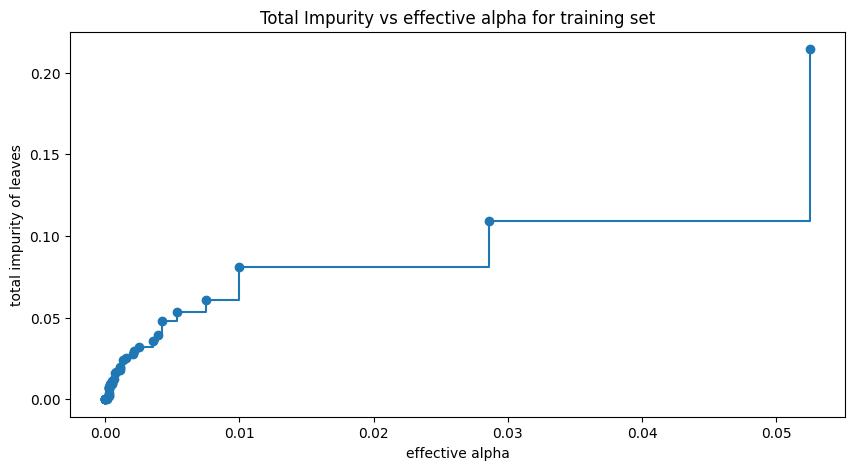

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced",max_depth=25,min_samples_leaf=4
    )
    clf.fit(X1_train, y1_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2856022707379148


For the remainder, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

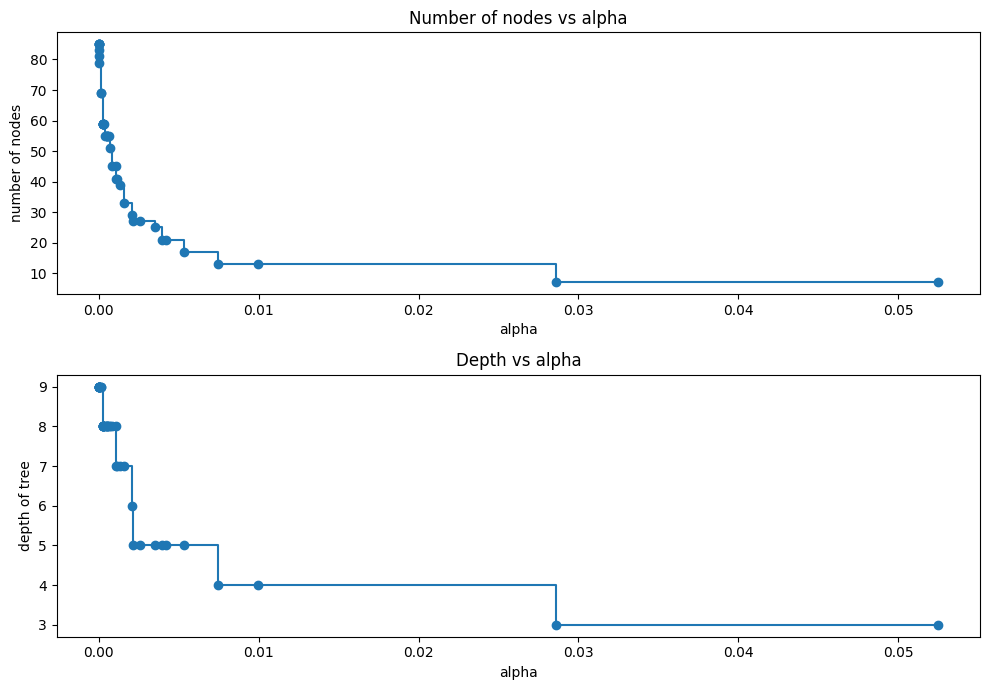

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X1_train)
    values_train = recall_score(y1_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X1_test)
    values_test = recall_score(y1_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X1_train, y1_train) for clf in clfs]
test_scores = [clf.score(X1_test, y1_test) for clf in clfs]

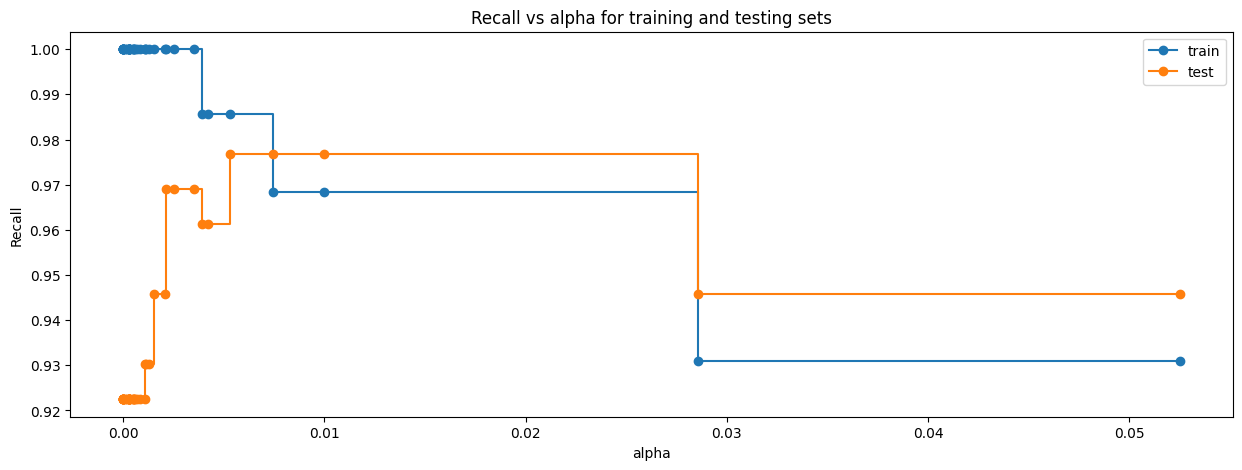

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.005323308593237604, class_weight='balanced',
                       max_depth=25, min_samples_leaf=4, random_state=1)


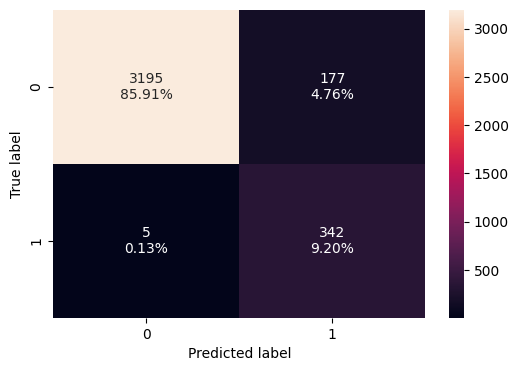

In [ ]:
confusion_matrix_sklearn(best_model, X1_train, y1_train)

In [ ]:
decision_tree_post_perf_train = model_performance_classification_sklearn(best_model, X1_train, y1_train)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.951062,0.985591,0.65896,0.789838


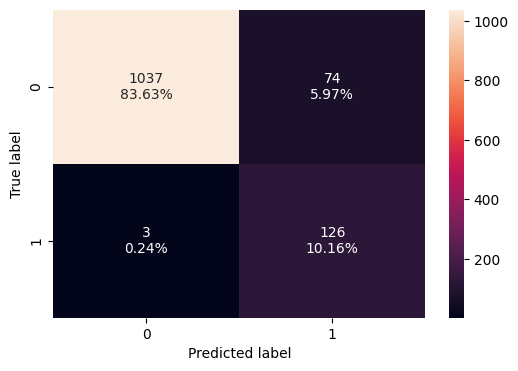

In [ ]:
confusion_matrix_sklearn(best_model, X1_test, y1_test)

In [ ]:
decision_tree_post_test = model_performance_classification_sklearn(
    best_model, X1_test, y1_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.937903,0.976744,0.63,0.765957


In the post-pruned tree also, the model is giving a generalized result since the recall scores on both the train and test data are coming to be around 0.98 and 97.6 which shows that the model is able to generalize well on unseen data.

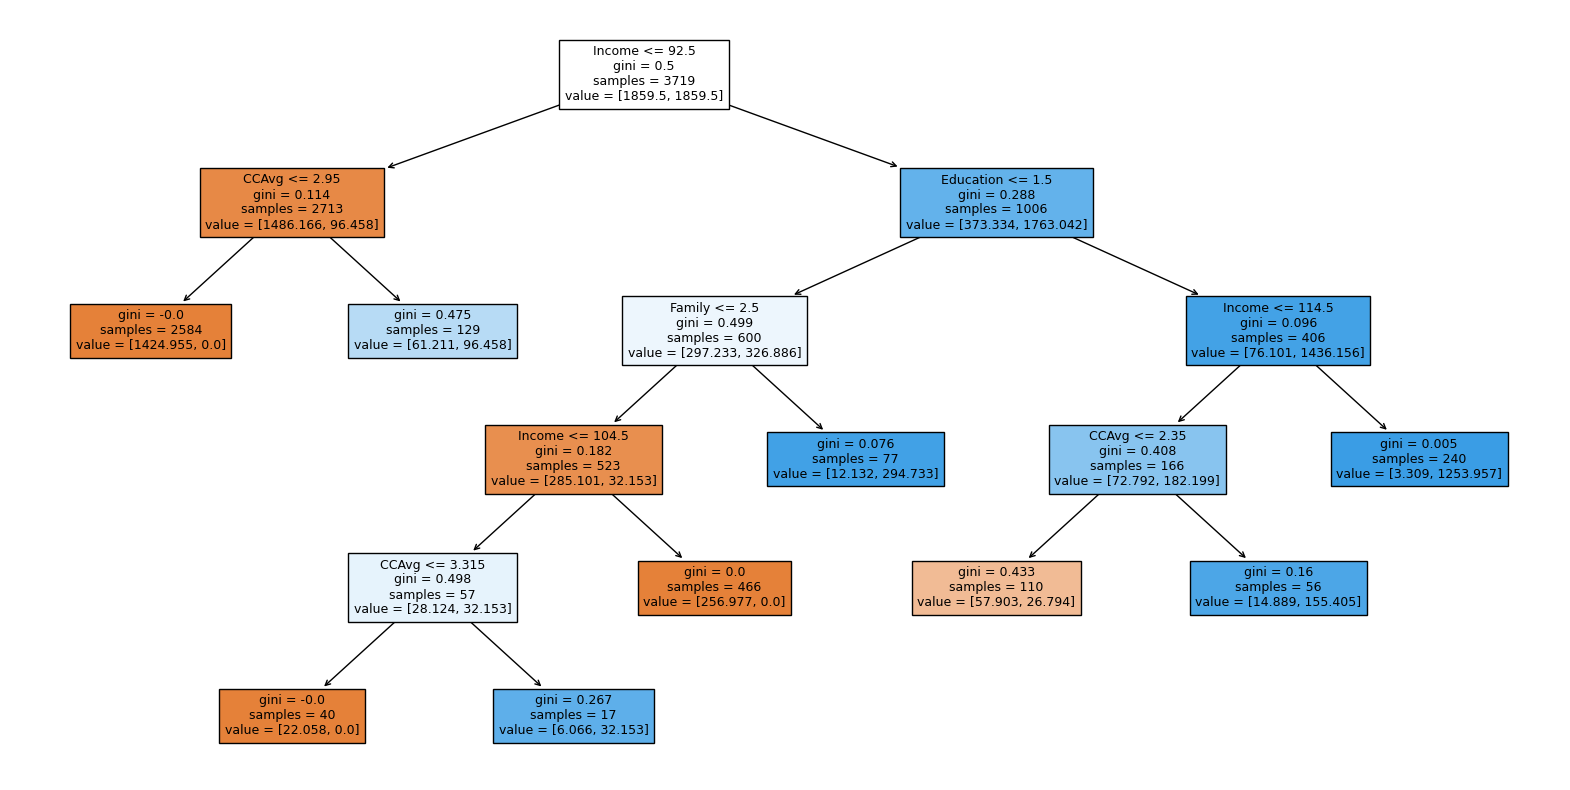

In [ ]:
#building the tree
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 92.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [1424.95, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- weights: [61.21, 96.46] class: 1
|--- Income >  92.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104.50
|   |   |   |   |--- CCAvg <= 3.31
|   |   |   |   |   |--- weights: [22.06, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3.31
|   |   |   |   |   |--- weights: [6.07, 32.15] class: 1
|   |   |   |--- Income >  104.50
|   |   |   |   |--- weights: [256.98, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [12.13, 294.73] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.35
|   |   |   |   |--- weights: [57.90, 26.79] class: 0
|   |   |   |--- CCAvg >  2.35
|   |   |   |   |--- weights: [14.89, 155.40] class: 1
|   |   |--- Income >  114.50
|   |   |   |--- weights: [3.31, 1253.96] class: 1



- We can see that the observation we got from the pre-pruned tree is closely matching the post pruned tree.

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

In [ ]:
plt.figure(figsize=(168, 168))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:
* In the post tuned decision tree, Income, Family,CCAvg and Education are the most important features.

# Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_without.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

NameError: name 'pd' is not defined

In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_without.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree without class_weight",
    "Decision Tree with class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

* Decision tree models with pre-pruning and post-pruning both are giving equally high recall scores on both training and test sets.
* However, we will choose the post pruned tree as the best model since it is giving a slightly high precision score on the train and test sets than the pre-pruned tree.

# Actionable Insights and Business Recommendations


* The model built can be used to predict if a customer will buy a personal loan or not 97.6% of the time.
* Income, Family, CCAvg, and Education are the most important features influencing customers' decisions to purchase a personal loan. These attributes have the greatest impact on determining whether a customer will choose to take out a personal loan.
* The bank should target who earns less than $92.5K and has at most under graduate education.

